In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
import streamlit as st

In [ ]:
#load dataset
df = pd.read_csv("C:/Users/Samruddhi/Downloads/Car_Price_Prediction.csv")
df.head()

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,Honda,Model B,2015,3.9,74176,Petrol,Manual,30246.207931
1,Ford,Model C,2014,1.7,94799,Electric,Automatic,22785.747684
2,BMW,Model B,2006,4.1,98385,Electric,Manual,25760.290347
3,Honda,Model B,2015,2.6,88919,Electric,Automatic,25638.003491
4,Honda,Model C,2004,3.4,138482,Petrol,Automatic,21021.386657


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          1000 non-null   object 
 1   Model         1000 non-null   object 
 2   Year          1000 non-null   int64  
 3   Engine Size   1000 non-null   float64
 4   Mileage       1000 non-null   int64  
 5   Fuel Type     1000 non-null   object 
 6   Transmission  1000 non-null   object 
 7   Price         1000 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


In [4]:
df.shape

(1000, 8)

In [ ]:
# Performing EDA
df.isnull().sum()

Make            0
Model           0
Year            0
Engine Size     0
Mileage         0
Fuel Type       0
Transmission    0
Price           0
dtype: int64

In [6]:
df.describe()

,Year,Engine Size,Mileage,Price
count,1000.000000,1000.000000,1000.00000,1000.000000
mean,2010.688000,2.798300,97192.48700,25136.615530
std,6.288577,1.024137,59447.31576,5181.401368
min,2000.000000,1.000000,56.00000,6704.953524
25%,2005.000000,1.900000,44768.75000,21587.878370
50%,2011.000000,2.800000,94411.50000,25189.325247
75%,2016.000000,3.700000,148977.75000,28806.368974
max,2021.000000,4.500000,199867.00000,41780.504635


In [7]:
print("Fuel Type")
print(df['Fuel Type'].value_counts())
print("Transmission")
print(df['Transmission'].value_counts())
print("Model")
print(df['Model'].value_counts())

Fuel Type
Diesel      344
Petrol      331
Electric    325
Name: Fuel Type, dtype: int64
Transmission
Manual       511
Automatic    489
Name: Transmission, dtype: int64
Model
Model B    212
Model C    205
Model A    202
Model D    197
Model E    184
Name: Model, dtype: int64


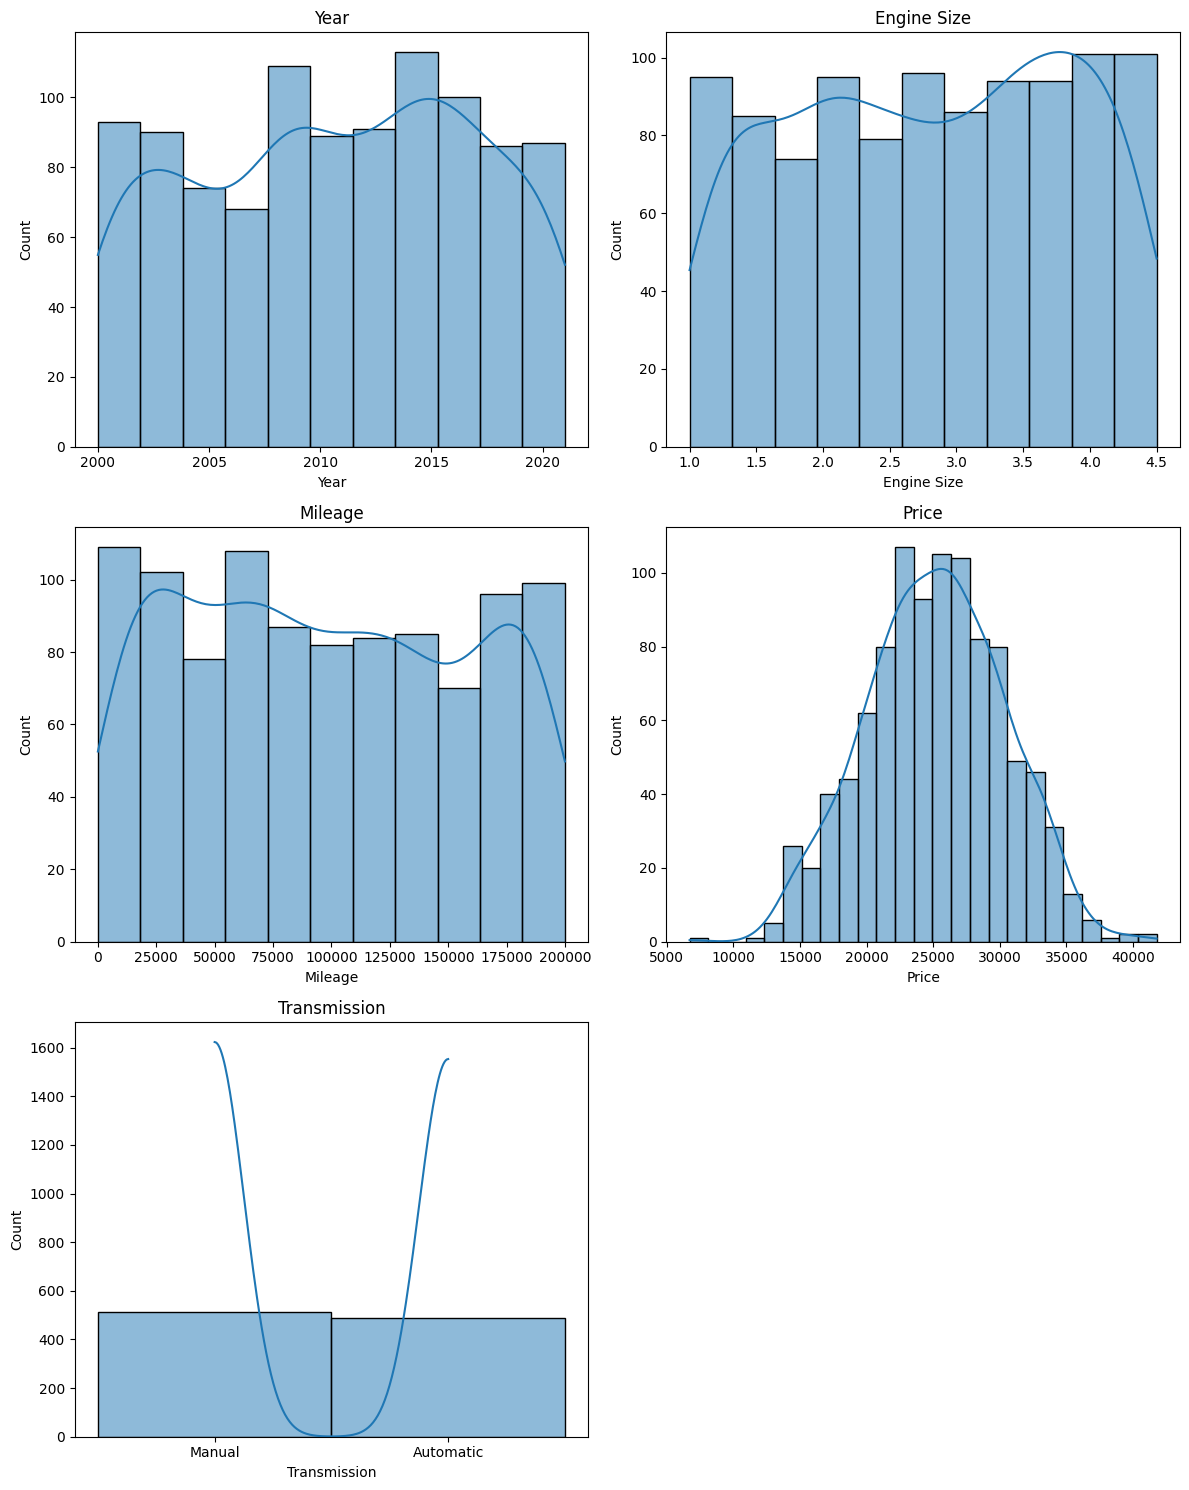

In [8]:
fig, ax = plt.subplots(3, 2, figsize=(12, 15))
fig.delaxes(ax[2, 1])   # delete last empty plot

cols = ['Year', 'Engine Size', 'Mileage', 'Price', 'Transmission']

for num, col in enumerate(cols):
    ax_def = ax.ravel()[num]
    sns.histplot(df[col], ax=ax_def, kde=True)
    ax_def.set_title(col)

plt.tight_layout()
plt.show()


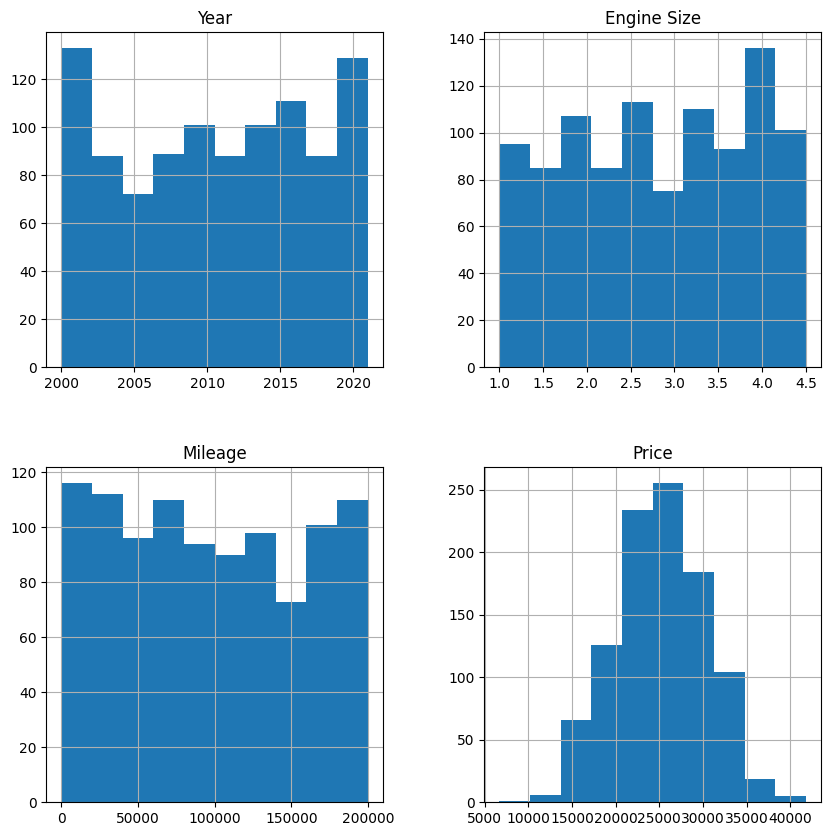

In [9]:
df[['Year', 'Engine Size', 'Mileage', 'Price']].hist(figsize=(10,10))
plt.show()

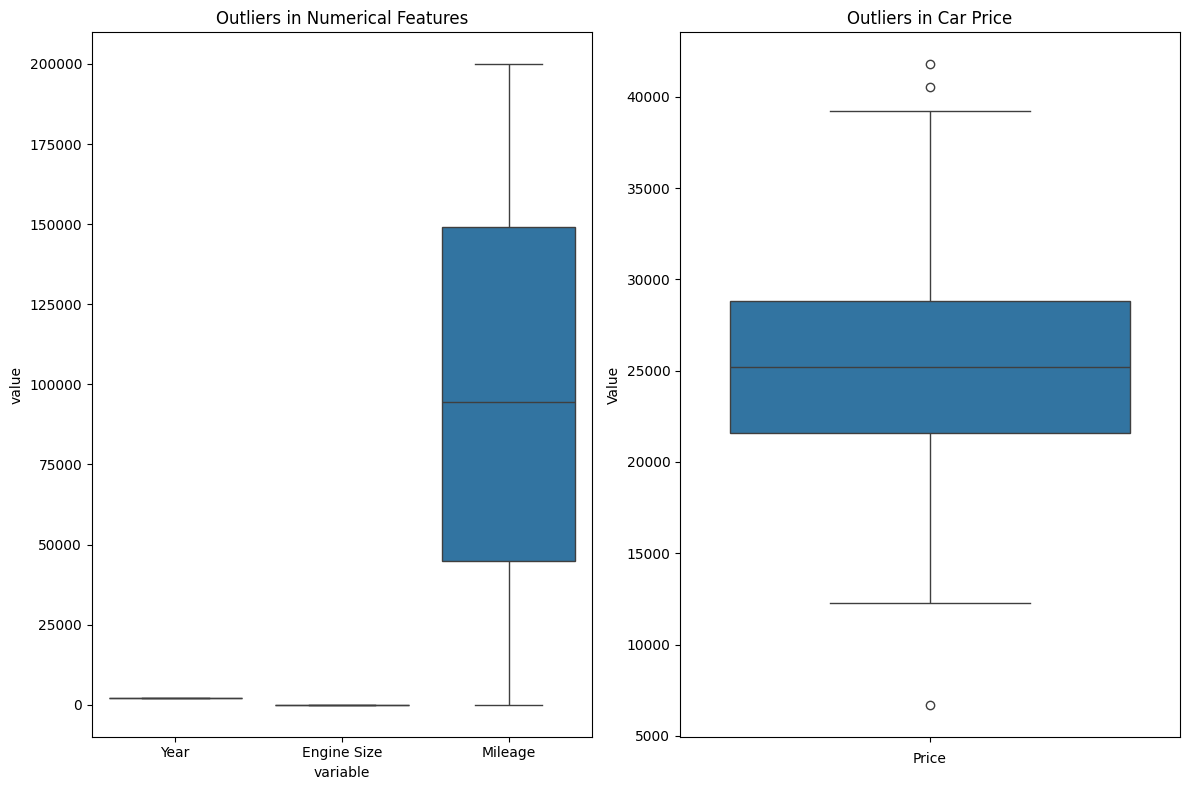

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

sns.boxplot(x='variable', y='value', data=pd.melt(df[['Year', 'Engine Size', 'Mileage']]),  ax=axs[0])


sns.boxplot(y='Price', data=df, ax=axs[1])

axs[0].set_title("Outliers in Numerical Features")
axs[1].set_title("Outliers in Car Price")

axs[1].set(xlabel='Price', ylabel='Value')

plt.tight_layout()
plt.show()

In [11]:
# ----- Outlier removal for Mileage -----
mileage_val = df['Mileage'].describe()
mileage_val

Q3_mil = df['Mileage'].quantile(0.75)
Q1_mil = df['Mileage'].quantile(0.25)
mileage_lim = 1.5 * (Q3_mil - Q1_mil) + Q3_mil


# ----- Outlier removal for Engine Size -----
engine_val = df['Engine Size'].describe()
engine_val

Q3_eng = df['Engine Size'].quantile(0.75)
Q1_eng = df['Engine Size'].quantile(0.25)
engine_lim = 1.5 * (Q3_eng - Q1_eng) + Q3_eng


# ----- Outlier removal for Price -----
price_val = df['Price'].describe()
price_val

Q3_pri = df['Price'].quantile(0.75)
Q1_pri = df['Price'].quantile(0.25)
price_lim = 1.5 * (Q3_pri - Q1_pri) + Q3_pri


# ----- Remove outliers -----
df = df[(df['Mileage'] < mileage_lim) &
        (df['Engine Size'] < engine_lim) &
        (df['Price'] < price_lim)]


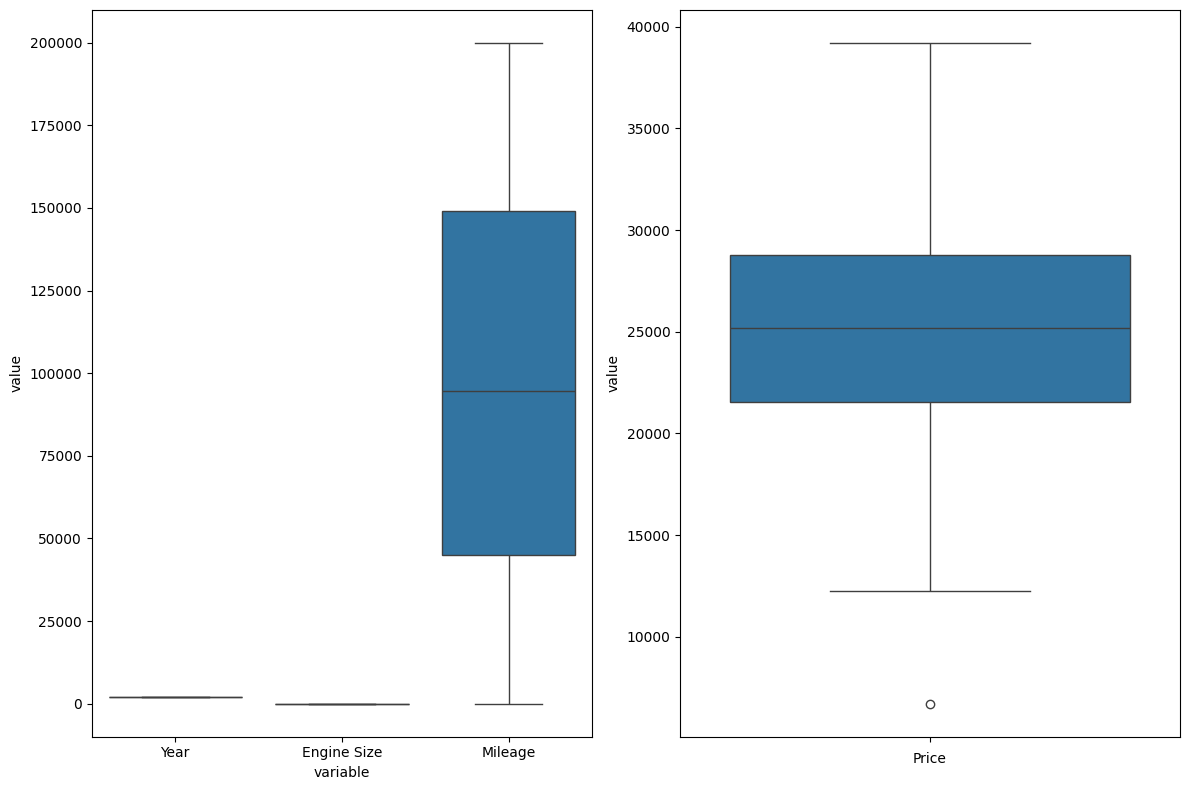

In [12]:

fig, axs = plt.subplots(1, 2, figsize=(12, 8))

sns.boxplot(x='variable', y='value',
            data=pd.melt(df[['Year', 'Engine Size', 'Mileage']]),
            ax=axs[0])

sns.boxplot(y='Price', data=df, ax=axs[1])

axs[1].set(xlabel='Price', ylabel='value')

plt.tight_layout()
plt.show()

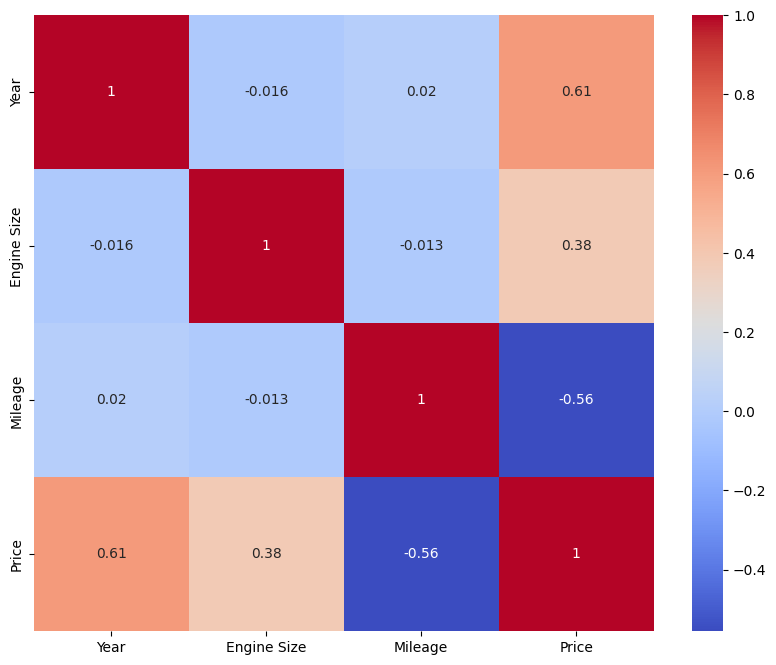

In [13]:

plt.figure(figsize=(10,8))
sns.heatmap(df[['Year','Engine Size','Mileage','Price']].corr(), annot=True, cmap="coolwarm")
plt.show()

In [14]:
df

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,Honda,Model B,2015,3.9,74176,Petrol,Manual,30246.207931
1,Ford,Model C,2014,1.7,94799,Electric,Automatic,22785.747684
2,BMW,Model B,2006,4.1,98385,Electric,Manual,25760.290347
3,Honda,Model B,2015,2.6,88919,Electric,Automatic,25638.003491
4,Honda,Model C,2004,3.4,138482,Petrol,Automatic,21021.386657
...,...,...,...,...,...,...,...,...
995,Toyota,Model D,2002,1.9,5445,Petrol,Manual,22765.597091
996,Honda,Model B,2020,3.1,149112,Diesel,Manual,30392.575567
997,Ford,Model C,2008,1.9,195387,Petrol,Automatic,16446.892292
998,Toyota,Model A,2003,4.4,246,Petrol,Automatic,27396.156708


In [15]:
# split data into two set
input_data = df.drop(columns='Price')
output_data=df['Price']

In [16]:
input_data

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission
0,Honda,Model B,2015,3.9,74176,Petrol,Manual
1,Ford,Model C,2014,1.7,94799,Electric,Automatic
2,BMW,Model B,2006,4.1,98385,Electric,Manual
3,Honda,Model B,2015,2.6,88919,Electric,Automatic
4,Honda,Model C,2004,3.4,138482,Petrol,Automatic
...,...,...,...,...,...,...,...
995,Toyota,Model D,2002,1.9,5445,Petrol,Manual
996,Honda,Model B,2020,3.1,149112,Diesel,Manual
997,Ford,Model C,2008,1.9,195387,Petrol,Automatic
998,Toyota,Model A,2003,4.4,246,Petrol,Automatic


In [17]:
output_data

0      30246.207931
1      22785.747684
2      25760.290347
3      25638.003491
4      21021.386657
           ...     
995    22765.597091
996    30392.575567
997    16446.892292
998    27396.156708
999    31620.864907
Name: Price, Length: 998, dtype: float64

In [18]:
# Encoding (convert categorical to numeric 0/1)

input_data = pd.get_dummies(input_data, drop_first=True)

# Convert True/False into 0/1
input_data = input_data.astype(int)

print(input_data.head())


   Year  Engine Size  Mileage  Make_BMW  Make_Ford  Make_Honda  Make_Toyota  \
0  2015            3    74176         0          0           1            0   
1  2014            1    94799         0          1           0            0   
2  2006            4    98385         1          0           0            0   
3  2015            2    88919         0          0           1            0   
4  2004            3   138482         0          0           1            0   

   Model_Model B  Model_Model C  Model_Model D  Model_Model E  \
0              1              0              0              0   
1              0              1              0              0   
2              1              0              0              0   
3              1              0              0              0   
4              0              1              0              0   

   Fuel Type_Electric  Fuel Type_Petrol  Transmission_Manual  
0                   0                 1                    1  
1       

In [19]:
# Training Testing Data
input_train_data , input_test_data , output_train_data , output_test_data = train_test_split(input_data,output_data,test_size=0.2)

In [20]:
print(input_data.shape,input_train_data.shape , input_test_data.shape)

(998, 14) (798, 14) (200, 14)


In [21]:
print(output_data.shape,output_train_data.shape , output_test_data.shape)

(998,) (798,) (200,)


In [22]:
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=200, random_state=42)
gb = GradientBoostingRegressor(random_state=42)

In [23]:
lr.fit(input_train_data, output_train_data)
rf.fit(input_train_data, output_train_data)
gb.fit(input_train_data, output_train_data)

GradientBoostingRegressor(random_state=42)

In [24]:
test_data_predictions1=lr.predict(input_test_data)
test_data_predictions2=rf.predict(input_test_data)
test_data_predictions3=gb.predict(input_test_data)

In [25]:
test_data_predictions1

array([19819.48057875, 27676.65158193, 17499.31587496, 17962.39078494,
       24170.24924228, 27459.21493068, 33451.42305063, 26481.12563773,
       33488.20878303, 22569.60833094, 27530.96703141, 30104.45363129,
       29589.80638202, 18468.62701086, 23358.18798228, 17970.46636706,
       25149.5637617 , 22618.4266057 , 17429.00024644, 31727.16281752,
       31050.53328468, 26987.13009974, 25980.73820239, 32449.32852835,
       24583.09239702, 29065.89769913, 34200.5555275 , 24037.35000592,
       27801.89513284, 32935.05856615, 26908.05958618, 29011.43785596,
       30682.91284159, 20520.6314807 , 20548.58880557, 20737.17639925,
       25239.79668012, 28112.91447902, 27439.28084618, 28950.66031592,
       13143.74002725, 24807.28225589, 22448.70287013, 31728.67079102,
       27515.08357181, 27467.13914533, 24923.69883691, 16451.32817231,
       29843.64476979, 17987.86960885, 23254.07532467, 24292.22012158,
       31302.99036548, 20444.86986257, 31679.41147997, 30224.95313154,
      

In [26]:
test_data_predictions2

array([18404.85183613, 27903.65307857, 17693.88060565, 16037.51792627,
       26967.24675819, 28344.19134764, 33303.55605206, 28144.24264266,
       33362.15381912, 22770.9194858 , 28908.55524194, 30493.37557077,
       30693.95716683, 18999.85377115, 24408.42182002, 15803.8525882 ,
       26442.58983297, 21893.36845177, 16800.31648632, 30672.55652267,
       28006.45136373, 26178.9477254 , 25474.592032  , 32104.75477483,
       24410.87651558, 29245.69458357, 33288.47316384, 23229.93642464,
       26914.97597328, 33812.49313472, 29400.93687384, 29088.34523394,
       30062.42084319, 19996.8597077 , 20435.50471061, 18994.65665724,
       27110.1714866 , 26775.31091799, 26716.3962838 , 29896.16320909,
       12129.91246931, 26767.34645502, 21794.11187835, 31413.7730532 ,
       26365.71344221, 27955.85067545, 23386.95980286, 15666.07959676,
       27788.12746748, 17503.67555008, 21954.76840301, 24108.33845081,
       31869.53976788, 21154.03398767, 33432.6241256 , 30528.92815738,
      

In [27]:
test_data_predictions3

array([18785.8709471 , 26475.74255895, 17021.84070164, 16979.67560827,
       25893.33588436, 28043.65784085, 34292.68835277, 28523.50179414,
       33469.59382949, 22803.8155108 , 28787.26866513, 31375.80534998,
       30089.1705778 , 19178.22370664, 24382.23211171, 16920.38339687,
       26288.57494833, 22778.42205402, 16660.68431324, 32083.03932471,
       29622.10263682, 27151.05183835, 24950.62558523, 32423.01328378,
       24606.76668047, 29656.74854855, 34756.15941915, 23340.09596987,
       28294.28092696, 32570.01110642, 28967.01749632, 29326.02700078,
       30355.16149767, 19911.63593717, 21037.53672868, 19146.29717419,
       24725.216729  , 28399.07129679, 27133.10987603, 29327.68084255,
       13554.19902708, 26260.81072417, 22446.33444818, 31051.83281512,
       27114.92844082, 28338.74551906, 23696.50612028, 16165.53077107,
       28715.71440377, 17746.01352095, 22697.18698799, 24738.48816272,
       31703.02814337, 21055.11921428, 33791.90206735, 29418.27312183,
      

In [28]:
# Evaluation Of the model

# Linear Regression
lr_pred = lr.predict(input_test_data)
lr_r2 = r2_score(output_test_data, lr_pred)
print("Linear Regression R2:", lr_r2)

# Random Forest
rf_pred = rf.predict(input_test_data)
rf_r2 = r2_score(output_test_data, rf_pred)
print("Random Forest R2:", rf_r2)

# Gradient Boosting
gb_pred = gb.predict(input_test_data)
gb_r2 = r2_score(output_test_data, gb_pred)
print("Gradient Boosting R2:", gb_r2)


Linear Regression R2: 0.8250901379885452
Random Forest R2: 0.7819749369850373
Gradient Boosting R2: 0.7912800785958652


In [29]:
# Final Training on Full DatasetT
final_model = LinearRegression()
final_model.fit(input_data, output_data)

print("The Training is done on final selection model")

The Training is done on final selection model


In [31]:
input_data = (2015, 3.9, 74176, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1)
input_data_array = np.asarray(input_data)

input_data_array = input_data_array.reshape(1, -1)

prediction = lr.predict(input_data_array)

print("Predicted Car Price:", prediction[0])


Predicted Car Price: 31148.007813500124


C:\Users\Samruddhi\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [32]:
import joblib
# Assuming `model` is your trained model
joblib.dump(lr, 'car_price_model.joblib')

['car_price_model.joblib']